<a href="https://colab.research.google.com/github/joseluan/ml_magalu/blob/main/Magalu_rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import gdown

In [2]:

nome_arquivo = 'magalu.csv'
# Baixando o csv das ofertas
gdown.download(url='https://drive.google.com/file/d/1PY0Jea-Mu1dohKDaCkjA9ppvAGRuRwA2/view?usp=sharing', output=nome_arquivo, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1PY0Jea-Mu1dohKDaCkjA9ppvAGRuRwA2
To: /content/magalu.csv
100%|██████████| 94.1k/94.1k [00:00<00:00, 47.1MB/s]


'magalu.csv'

In [3]:
dataframe = pd.read_csv(nome_arquivo) # Carregando o csv das ofertas


##Pre-processamento

In [4]:
dataframe = dataframe.drop_duplicates() #Removendo duplicadas
dataframe = dataframe[dataframe['status'] != 'FINISHED'] # Retirando ofertas antigas
dataframe['status'] = dataframe['status'].replace('APPROVED', 1) # Mudando o valor de string para int
#dataframe['status'] = dataframe['status'].replace('FINISHED', 0) # Mudando o valor de string para int
dataframe['status'] = dataframe['status'].replace('REPPROVED', 0) # Mudando o valor de string para int

#Retirando linhas quando os valores de historico de ano, 6 meses e 3 meses do zoom forem igual a zero
dataframe = dataframe[dataframe['average_year'] > 0]
dataframe = dataframe[dataframe['var_year'] > 0]
dataframe = dataframe[dataframe['std_year'] > 0]

dataframe = dataframe[dataframe['average_six_months'] > 0]
dataframe = dataframe[dataframe['var_six_months'] > 0]
dataframe = dataframe[dataframe['std_six_months'] > 0]

dataframe = dataframe[dataframe['average_three_months'] > 0]
dataframe = dataframe[dataframe['var_three_months'] > 0]
dataframe = dataframe[dataframe['std_three_months'] > 0]

del dataframe['var_year']
del dataframe['std_year']

del dataframe['var_six_months']
del dataframe['std_six_months']

del dataframe['var_three_months']
del dataframe['std_three_months']


In [5]:
# Separando os dados entre treinamento e treino
X = dataframe.iloc[:,1:]
# a última coluna se refere a classe
y = dataframe.loc[:,'status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 297 to 116
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 156 non-null    float64
 1   old_price             156 non-null    float64
 2   average_year          156 non-null    float64
 3   average_six_months    156 non-null    float64
 4   average_three_months  156 non-null    float64
 5   status                156 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 8.5 KB


##Treinamento

In [6]:
mlp = MLPClassifier(activation='identity',solver='lbfgs',hidden_layer_sizes=(30), random_state=1, learning_rate_init=0.001)

mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
mlp.score(X_test, y_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.50      0.86      0.63        21
           1       0.00      0.00      0.00        18

    accuracy                           0.46        39
   macro avg       0.25      0.43      0.32        39
weighted avg       0.27      0.46      0.34        39



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


##Comparando as funções de ativação

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


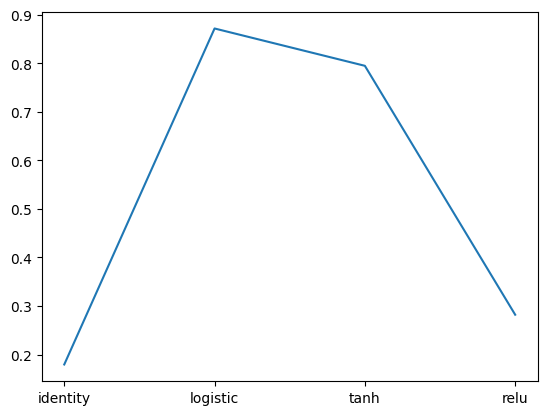

In [7]:
funcoes_ativacao = [ 'identity', 'logistic', 'tanh', 'relu']
resultados = {}
for funcao in funcoes_ativacao:
  mlp = MLPClassifier(activation=funcao,solver='adam',hidden_layer_sizes=(30), random_state=1, learning_rate_init=0.001)

  mlp.fit(X_train,y_train)

  y_pred = mlp.predict(X_test)
  mlp.score(X_test, y_test)

  resultados[funcao] = accuracy_score(y_test,y_pred)

plt.plot(funcoes_ativacao,list(resultados.values()))

##Encontrando o melhor algoritmo de correção de pesos

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


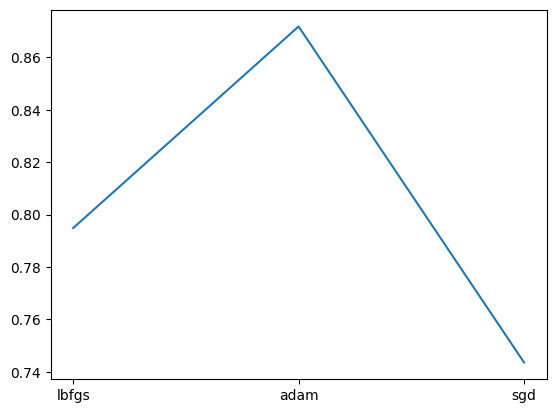

In [9]:
funcoes_correcao = [ 'lbfgs', 'adam', 'sgd']
resultados = {}
for funcao in funcoes_correcao:
  mlp = MLPClassifier(activation='logistic',solver=funcao,hidden_layer_sizes=(30), random_state=1, learning_rate_init=0.001)

  mlp.fit(X_train,y_train)

  y_pred = mlp.predict(X_test)
  mlp.score(X_test, y_test)

  resultados[funcao] = accuracy_score(y_test,y_pred)

plt.plot(funcoes_correcao,list(resultados.values()))

##Encontrando uma quantidade de camadas adequadas

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

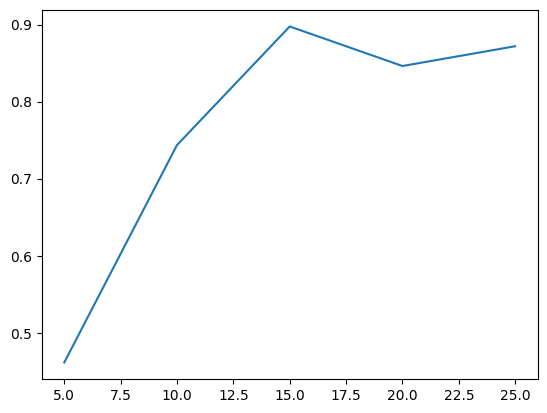

In [11]:
resultados = {}
camadas = range(5, 30, 5)
for qtd_camadas in camadas:
  mlp = MLPClassifier(activation='logistic',solver='adam',hidden_layer_sizes=(qtd_camadas), random_state=1, learning_rate_init=0.001)

  mlp.fit(X_train,y_train)

  y_pred = mlp.predict(X_test)
  mlp.score(X_test, y_test)

  resultados[qtd_camadas] = accuracy_score(y_test,y_pred)

plt.plot(camadas,list(resultados.values()))

##Melhor combinação foi encontrada

In [13]:
mlp = MLPClassifier(activation='logistic',solver='adam',hidden_layer_sizes=(15), random_state=1, learning_rate_init=0.001)

mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
mlp.score(X_test, y_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.94      0.83      0.88        18

    accuracy                           0.90        39
   macro avg       0.90      0.89      0.90        39
weighted avg       0.90      0.90      0.90        39



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
